In [58]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

df = pd.read_csv('ee6d2f60cdafb550.csv')
df = df.dropna()
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
print(len(integer_encoded))
print(len(df.FFI49_desc))
df.FFI49_desc = integer_encoded
df.divyield_Median = [float(x.strip('%'))/100 for x in df.divyield_Median]

print(len(np.where(df.indret_vw > 0)[0]))
print(len(np.where(df.indret_vw < 0)[0]))

9297
9297
5410
3886


In [61]:
output = df.indret_vw
outputtwo = df.indret_ew
data = df.drop(columns = ['indret_ew','indret_vw','staff_sale_Median'])
data = data.iloc[:,3:]

print(data)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, output, test_size=0.20)

       dpr_Median  PEG_trailing_Median  bm_Median  CAPEI_Median  \
12337       0.460                4.556      0.438        21.835   
12383       0.460                4.380      0.438        20.573   
12430       0.460                4.268      0.438        20.959   
12477       0.479                3.865      0.401        19.861   
12524       0.479                4.122      0.401        21.179   
12571       0.479                4.190      0.401        21.483   
12618       0.394               11.991      0.406        22.148   
12665       0.394               11.971      0.406        20.340   
12712       0.394               11.623      0.406        19.663   
12759       0.394                3.700      0.393        19.092   
12806       0.394                3.833      0.393        18.900   
12853       0.394                3.825      0.393        19.442   
12900       0.398                1.836      0.397        19.539   
12947       0.398                1.765      0.397        18.76

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)
reg.coef_

y_pred = reg.predict(x_test)
print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))


mse: 0.00472966495363289
r2: 0.04254254781910127


In [63]:
df.head()

,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
12337,19930831,25,6,0.052904,0.068678,0.460,4.556,0.438,21.835,0.0229,...,5.494,3.146,2.601,9.285,0.049,0.068,0.013,0.0,-0.333,1.572
12383,19930930,25,6,-0.035253,-0.046242,0.460,4.380,0.438,20.573,0.0245,...,5.494,3.146,2.601,9.285,0.056,0.042,0.013,0.0,-0.320,1.445
12430,19931031,25,6,0.009319,-0.018318,0.460,4.268,0.438,20.959,0.0251,...,5.685,3.027,2.484,9.285,0.056,0.042,0.013,0.0,-0.350,1.422
12477,19931130,25,5,-0.022123,-0.014000,0.479,3.865,0.401,19.861,0.0273,...,5.364,2.755,2.345,8.303,0.057,0.080,0.016,0.0,0.677,1.848
12524,19931231,25,5,0.096039,0.072342,0.479,4.122,0.401,21.179,0.0255,...,5.364,2.755,2.345,8.303,0.057,0.080,0.016,0.0,0.722,1.962


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

#Binary classification-Logistic Regression
transformed_output = [1 if o >= 0 else -1 for o in output]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data, transformed_output, test_size=0.20)

clf = LogisticRegression(random_state=229, solver='liblinear').fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(y_train.count(1))
print(y_train.count(-1))

print(y_train.count(1)/(y_train.count(1)+y_train.count(-1)))

print(y_test.count(1))
print(y_test.count(-1))
print(y_test.count(1)/(y_test.count(1)+y_test.count(-1)))

print("mse: " + str(mean_squared_error(y_test, y_pred)))
print("r2: " + str(sklearn.metrics.r2_score(y_test,y_pred)))

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

unique, counts = np.unique(y_pred, return_counts=True)
print('{}\t{}'.format(unique, counts))
print(counts[0] / counts[1])

4329
3108
0.582089552238806
1082
778
0.5817204301075268
mse: 1.5032258064516129
r2: -0.5444834615512542
0.6241935483870967
[-1  1]	[ 263 1597]
0.16468378209142143


number of increasing1597


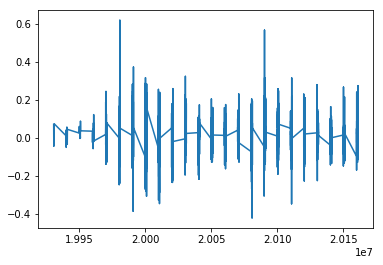

number of decreasing263
Average precision-recall score: 0.62


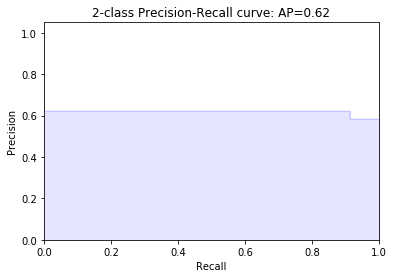

In [65]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

print("number of increasing" + str(len(np.where(y_pred > 0)[0])))

plt.plot(df.public_date, output)

plt.show()

print("number of decreasing" + str(len(np.where(y_pred < 0)[0])))
      
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.1,
         where='post')
plt.fill_between(recall, precision, alpha=0.1, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

In [43]:
dfsp = pd.read_csv('eafe6a287f1adb2b.csv')
outputsp = df.indret_ew
outputtwosp = df.indret_vw

FileNotFoundError: File b'eafe6a287f1adb2b.csv' does not exist

In [41]:
df = pd.read_csv('ee6d2f60cdafb550.csv')
df.sort_values(by='public_date')


,public_date,FFI49_desc,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,divyield_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
0,19700131,AERO,8,-0.117325,-0.149955,0.000,1.356,0.696,8.490,4.76%,...,8.843,4.416,3.019,7.479,0.021,0.000,0.000,0.388,NaN,NaN
22,19700131,HSHLD,25,-0.070517,-0.068231,0.000,2.131,0.351,18.974,3.20%,...,7.856,2.443,2.057,3.981,0.002,0.000,0.000,0.000,NaN,NaN
23,19700131,LABEQ,1,-0.083478,-0.083478,0.000,8.505,0.191,44.643,NaN,...,5.992,1.585,1.580,2.582,-0.058,0.000,0.000,0.445,NaN,NaN
24,19700131,MACH,40,-0.038664,-0.071795,0.048,1.270,0.524,10.474,4.68%,...,5.539,2.145,1.697,3.062,0.003,0.000,0.000,0.000,NaN,NaN
25,19700131,MEALS,1,-0.326923,-0.326923,0.448,0.053,0.266,3.652,3.43%,...,13.913,2.512,1.757,7.331,0.028,0.000,0.000,0.000,NaN,NaN
26,19700131,MEDEQ,1,-0.007937,-0.007937,0.000,7.421,0.423,34.144,1.07%,...,4.370,2.041,1.355,1.788,0.044,0.000,0.000,0.000,NaN,NaN
27,19700131,MINES,7,-0.046483,-0.064723,0.000,0.348,0.463,12.518,5.73%,...,7.728,0.969,0.884,2.951,0.049,0.000,0.000,0.000,NaN,NaN
28,19700131,OIL,21,-0.122596,-0.128312,0.000,1.369,0.534,10.543,5.10%,...,5.704,1.080,0.824,5.185,0.059,0.000,0.000,0.115,NaN,NaN
30,19700131,RTAIL,27,-0.056199,-0.059770,0.000,2.129,0.673,13.637,3.57%,...,30.907,4.600,3.510,8.853,0.008,0.000,0.000,0.000,NaN,NaN
31,19700131,SHIPS,3,-0.050288,-0.056947,0.000,0.190,0.795,9.208,5.18%,...,5.147,3.072,2.410,4.715,-0.019,0.000,0.000,0.000,NaN,NaN


In [42]:
df.describe()

,public_date,NFIRM,indret_ew,indret_vw,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,evm_Median,pcf_Median,...,rect_turn_Median,sale_equity_Median,sale_invcap_Median,sale_nwc_Median,accrual_Median,rd_sale_Median,adv_sale_Median,staff_sale_Median,PEG_1yrforward_Median,PEG_ltgforward_Median
count,2.518800e+04,25188.000000,25143.000000,25143.000000,25034.000000,23865.000000,25186.000000,25187.000000,25186.000000,25186.000000,...,25138.000000,25188.000000,25188.000000,24577.000000,25186.000000,25188.000000,25186.000000,25186.000000,21555.000000,18984.000000
mean,1.993518e+07,10.681753,0.011830,0.010508,0.292932,1.409593,0.635862,21.112411,8.885819,10.261947,...,9.498688,2.798205,1.629473,7.949518,0.035598,0.013711,0.013081,0.039355,0.666897,1.408018
std,1.346762e+05,9.359648,0.075221,0.073355,1.845015,2.816861,0.421867,103.482835,8.215927,11.249100,...,11.207948,13.426756,0.792297,458.055652,0.041333,0.030763,0.024436,0.094464,2.070773,1.854341
min,1.970013e+07,1.000000,-0.477184,-0.477206,-4.003000,-15.636000,0.001000,-1031.000000,-634.290000,-329.770000,...,0.082000,0.417000,0.232000,-40463.000000,-0.389000,0.000000,0.000000,0.000000,-50.389000,-30.091000
25%,1.982053e+07,3.000000,-0.028681,-0.028955,0.033000,0.470000,0.335000,12.354500,6.507000,6.056000,...,5.681000,1.783750,1.124000,4.228000,0.014000,0.000000,0.000000,0.000000,0.194000,1.016000
50%,1.994023e+07,8.000000,0.011136,0.010303,0.248000,0.867000,0.516000,18.219000,8.433000,9.228500,...,7.010000,2.358000,1.546000,6.693000,0.037000,0.000000,0.000000,0.000000,0.713000,1.365000
75%,2.005093e+07,15.000000,0.051200,0.049365,0.390000,1.479000,0.828000,25.026000,10.588750,13.142250,...,9.101000,3.071000,1.989000,11.896000,0.057000,0.010000,0.016000,0.000000,1.257000,1.755000
max,2.017013e+07,51.000000,1.320997,1.239549,163.957000,74.358000,3.768000,7522.850000,216.961000,349.224000,...,300.799000,1209.790000,7.614000,8210.620000,0.655000,0.202000,0.152000,0.477000,32.240000,42.843000
